# ADABOOST CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('brain_stroke.csv')
del df['ever_married']
del df['work_type']
del df['Residence_type']
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['gender','smoking_status']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df.tail()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4976,1,41.0,0,0,70.15,29.8,1,0
4977,1,40.0,0,0,191.15,31.1,3,0
4978,0,45.0,1,0,95.02,31.8,3,0
4979,1,40.0,0,0,83.94,30.0,3,0
4980,0,80.0,1,0,83.75,29.1,2,0


In [8]:
x1 = df.drop(labels='stroke', axis=1)
y1 = df.loc[:,'stroke']

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 4733, 1: 248})
OVER SAMPLING DATA COUNT  :  Counter({1: 4733, 0: 4733})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  7572
NUMBER OF TEST DATASET      :  1894
TOTAL NUMBER OF DATASET    :  9466


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  7572
NUMBER OF TEST DATASET      :  1894
TOTAL NUMBER OF DATASET    :  9466


In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ADB = AdaBoostClassifier(random_state=42)
ADB.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [14]:
predicted = ADB.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


 [[700 247]
 [125 822]]


In [16]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ADB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [80.20063358 80.66561014 78.86951928 79.76756471 78.97517169]


In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS : 80.35902851108764


In [18]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ADABOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF ADABOOST CLASSIFIER IS : 19.640971488912353


In [19]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print("THE PRECISION SCORE OF ADABOOST CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF ADABOOST CLASSIFIER IS : 76.89429373246024


In [20]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print("THE RECALL SCORE OF ADABOOST CLASSIFIER IS :",R*100)

THE RECALL SCORE OF ADABOOST CLASSIFIER IS : 86.80042238648363


In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted)
print("THE PRECISION SCORE OF ADABOOST CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF ADABOOST CLASSIFIER IS : 81.54761904761905


THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


[[700 247]
 [125 822]]


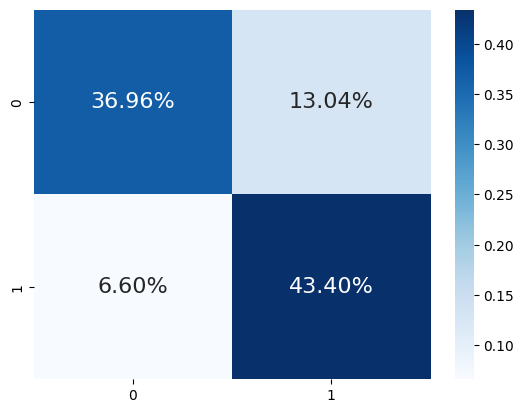

In [22]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

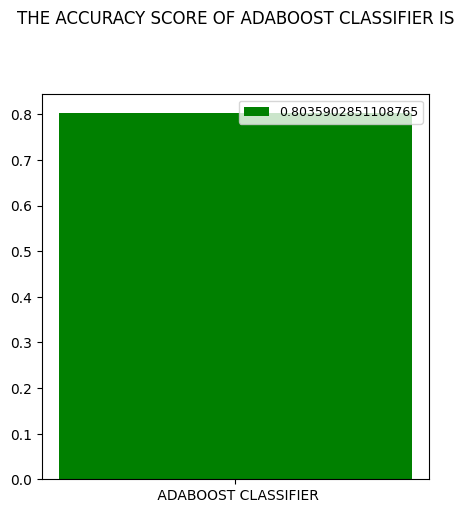

In [23]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg=" ADABOOST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("GREEN"))
    plt.title("THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()